!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info missingno==0.5.2 pyreadr==0.4.7 upsetplot==0.8.0

In [1]:
!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info missingno==0.5.2 pyreadr==0.4.7 upsetplot==0.8.0

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import scipy.stats
from sklearn.neighbors import KernelDensity
import missingno
import pyreadr
import upsetplot

In [3]:
%matplotlib inline
sns.set_style(rc={'axes.facecolor':'#dddede'}, style = 'darkgrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (9, 6)


continent_color = {
    'America': '#97DB4F',
    'Europe': '#0f7175ff',
    'Asia' :'#c65dc9ff',
    'Oceania':'#F9704E',
    'Africa': '#53d8fb'
}

In [4]:
%run pandas-missing-extension.ipynb

In [5]:
df_crime = pd.read_csv('data/crime.csv')

$x('//*[@id="t2"]/tbody/tr/td[2]/text()').map(elm => elm.wholeText)

In [6]:
africa = ['South Africa', 'Somalia', 'Nigeria', 'Angola', 'Cameroon', 'Namibia', 'Mozambique', 'Zimbabwe', 'Libya', 'Kenya', 'Tanzania', 'Uganda', 'Botswana', 'Algeria', 'Ethiopia', 'Zambia', 'Mauritius', 'Egypt', 'Morocco', 'Sudan', 'Tunisia', 'Ghana', 'Rwanda']
america = ['Venezuela', 'Honduras', 'Trinidad And Tobago', 'Guyana', 'Jamaica', 'Peru', 'Brazil', 'El Salvador', 'Argentina', 'Bahamas', 'Puerto Rico', 'Dominican Republic', 'Us Virgin Islands', 'Bolivia', 'Colombia', 'Guatemala', 'Ecuador', 'Chile', 'Mexico', 'Costa Rica', 'Belize', 'Uruguay', 'Paraguay', 'United States', 'Nicaragua', 'Barbados', 'Canada', 'Panama', 'Cuba']
asia = ['Afghanistan', 'Syria', 'Bangladesh', 'Kyrgyzstan', 'Maldives', 'Mongolia', 'Cambodia', 'Malaysia', 'Kazakhstan', 'North Korea', 'Iran', 'Myanmar', 'Lebanon', 'Iraq', 'Indonesia', 'India', 'Vietnam', 'Philippines', 'Pakistan', 'Sri Lanka', 'Jordan', 'Palestine', 'Turkey', 'Thailand', 'Nepal', 'Uzbekistan', 'Israel', 'Kuwait', 'Azerbaijan', 'Cyprus', 'Singapore', 'Brunei', 'China', 'Georgia', 'South Korea', 'Saudi Arabia', 'Bahrain', 'Japan', 'Armenia', 'Hong Kong (China)', 'Oman', 'Taiwan (China)', 'United Arab Emirates', 'Qatar']
europe = ['Belarus', 'France', 'Belgium', 'Sweden', 'Moldova', 'Greece', 'United Kingdom', 'Italy', 'Ukraine', 'Ireland', 'Albania', 'Bosnia And Herzegovina', 'Malta', 'North Macedonia', 'Kosovo (Disputed Territory)', 'Montenegro', 'Russia', 'Serbia', 'Bulgaria', 'Latvia', 'Germany', 'Spain', 'Luxembourg', 'Hungary', 'Norway', 'Lithuania', 'Romania', 'Portugal', 'Slovakia', 'Poland', 'Netherlands', 'Austria', 'Finland', 'Czech Republic', 'Denmark', 'Estonia', 'Iceland', 'Monaco', 'Croatia', 'Slovenia', 'Switzerland', 'Isle Of Man']
oceania = ['Papua New Guinea', 'Fiji', 'New Zealand', 'Australia']

afric_dict = dict.fromkeys(africa, 'Africa')
americ_dict = dict.fromkeys(america, 'America')
asia_dict = dict.fromkeys(asia, 'Asia')
europe_dict = dict.fromkeys(europe, 'Europe')
oceania_dict = dict.fromkeys(oceania, 'Oceania')

dictionary = afric_dict | americ_dict | asia_dict | europe_dict | oceania_dict

df_crime['Continent'] = df_crime['Country'].map(dictionary)
df_crime

,Country,Crime Index,Safety Index,Continent
0,Venezuela,82.6,17.4,America
1,Papua New Guinea,79.9,20.1,Oceania
2,Afghanistan,78.6,21.4,Asia
3,South Africa,75.4,24.6,Africa
4,Honduras,74.2,25.8,America
...,...,...,...,...
137,Oman,19.7,80.3,Asia
138,Isle Of Man,18.0,82.0,Europe
139,Taiwan (China),16.2,83.8,Asia
140,United Arab Emirates,15.1,84.9,Asia


In [7]:
df_crime.columns = df_crime.columns.str.replace(' Index', '')
df_crime.columns

Index(['Country', 'Crime', 'Safety', 'Continent'], dtype='object')

In [8]:
def Remove_Outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

In [9]:
outliers = Remove_Outlier(df_crime)

crime = df_crime[outliers]

crime.isnull().sum()

/tmp/ipykernel_2880/1591930294.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/tmp/ipykernel_2880/1591930294.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
/tmp/ipykernel_2880/1591930294.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))


Country      0
Crime        0
Safety       0
Continent    0
dtype: int64

# Data Validation

In [10]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    142 non-null    object 
 1   Crime      142 non-null    float64
 2   Safety     142 non-null    float64
 3   Continent  142 non-null    object 
dtypes: float64(2), object(2)
memory usage: 4.6+ KB


In [11]:
df_crime.describe()

,Crime,Safety
count,142.000000,142.000000
mean,45.340845,54.659155
std,15.123525,15.123525
min,14.800000,17.400000
25%,32.700000,44.800000
50%,46.000000,54.000000
75%,55.200000,67.300000
max,82.600000,85.200000


In [12]:
df_crime.shape

(142, 4)

# Count

## Trend Measures

### Mean

In [13]:
df_crime.mean()

/tmp/ipykernel_2880/1930919761.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_crime.mean()


Crime     45.340845
Safety    54.659155
dtype: float64

### Median 

In [14]:
df_crime.mean()

/tmp/ipykernel_2880/1930919761.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_crime.mean()


Crime     45.340845
Safety    54.659155
dtype: float64

### Mode

In [15]:
df_crime.mode(axis = 0, numeric_only=True, dropna = True)

,Crime,Safety
0,24.6,75.4


## Dispersion Measures

### Max values

In [16]:
df_crime.max(numeric_only= True)

Crime     82.6
Safety    85.2
dtype: float64

### Min values

In [17]:
df_crime.min(numeric_only=True)

Crime     14.8
Safety    17.4
dtype: float64

### Std

In [18]:
df_crime.std()

/tmp/ipykernel_2880/2192952983.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_crime.std()


Crime     15.123525
Safety    15.123525
dtype: float64

In [19]:
(
    df_crime
    .quantile(q = [0.75,0.5,0.25])
    .T
    .rename_axis('variables')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

/tmp/ipykernel_2880/3091788264.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_crime


,variables,0.75,0.5,0.25,iqr
0,Crime,55.2,46.0,32.7,22.5
1,Safety,67.3,54.0,44.8,22.5


# Distribution Visualization

## Histplot

In [20]:
cols = df_crime.select_dtypes(np.number).columns

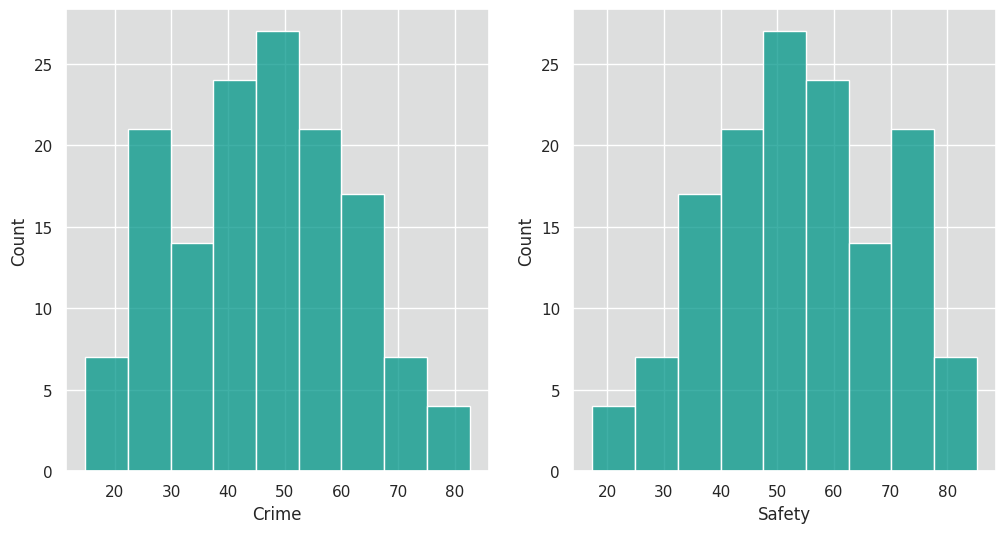

In [21]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

for i, i_col in enumerate(cols):
    sns.histplot(
        ax = ax[i],
        data = df_crime,
        x = i_col,
        color = '#009688'
    )

## Boxplot

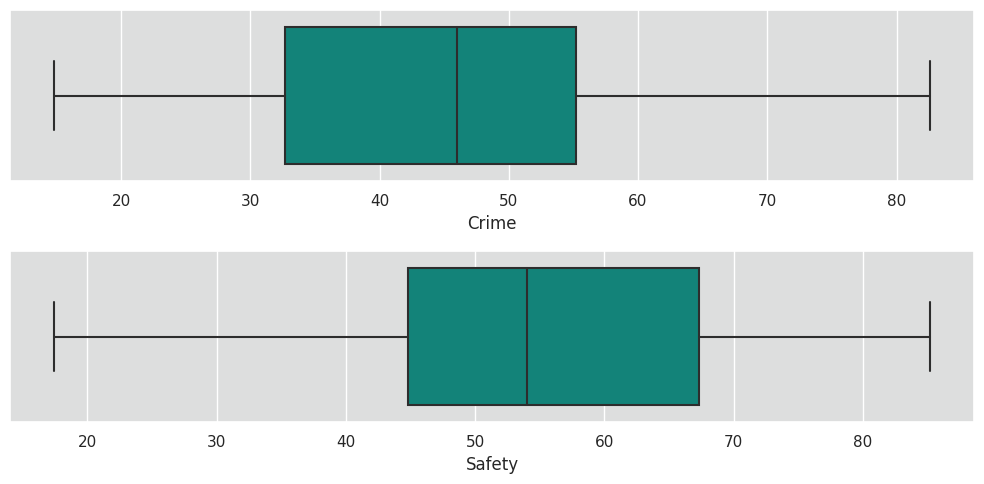

In [22]:
fig, ax = plt.subplots(2, figsize = (10,5))

for i, i_col in enumerate(cols):
    sns.boxplot(
        ax = ax[i],
        data = df_crime,
        x = i_col,
        color = '#009688'
    )

plt.tight_layout()

<AxesSubplot: xlabel='Safety', ylabel='Continent'>

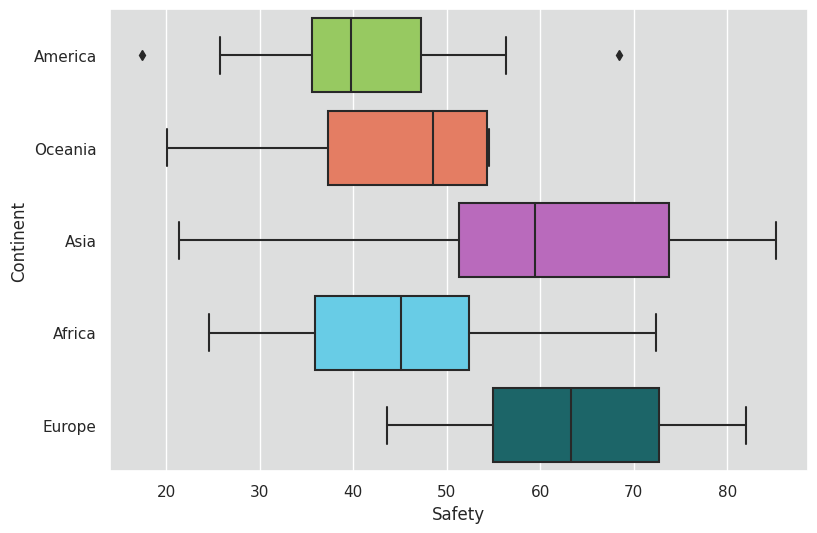

In [23]:
sns.boxplot(
    data = df_crime,
    x = 'Safety',
    y = 'Continent',
    palette= continent_color
)

In [24]:
sorted_safety = df_crime.sort_values('Safety',ascending=False)

most_safety = sorted_safety.head(10)
less_safety = sorted_safety.tail(10)

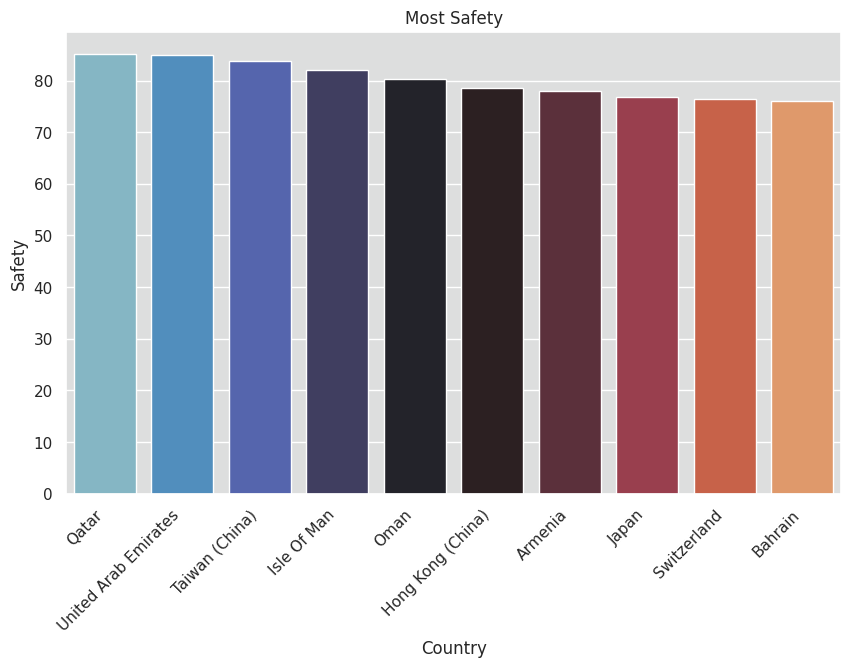

In [132]:
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(
    data=most_safety,
    x="Country",
    y="Safety",
    palette= 'icefire',
    ax=ax
)


ax.set_title('Most Safety')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()

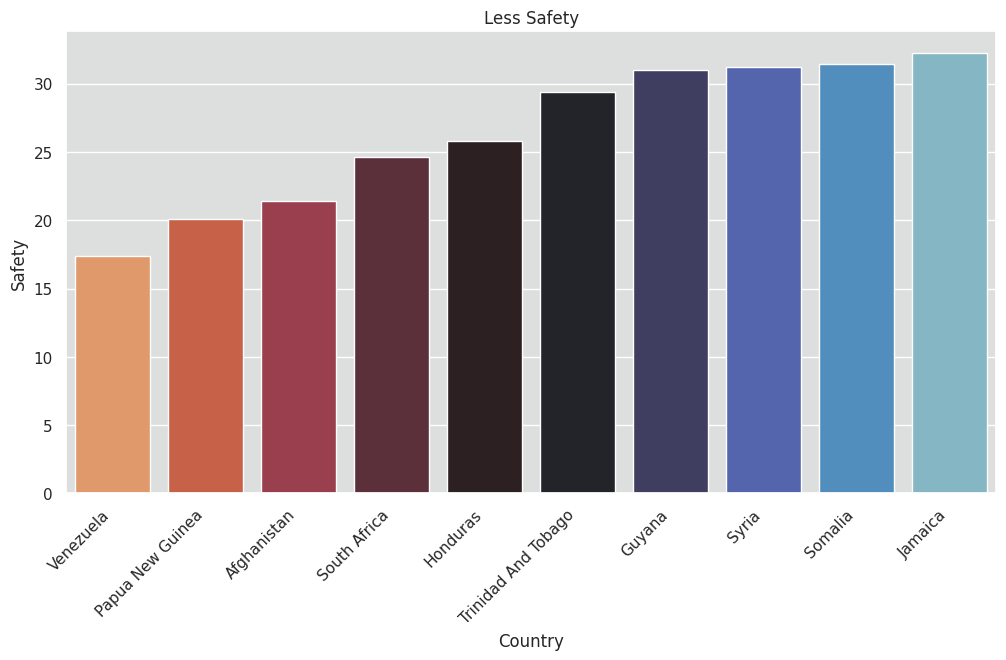

In [133]:
fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(
    data = less_safety,
    x = 'Country',
    y = 'Safety',
    palette= 'icefire_r',
    ax = ax,
    order = less_safety.sort_values('Safety',ascending=True).Country
)



ax.set_title('Less Safety')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()

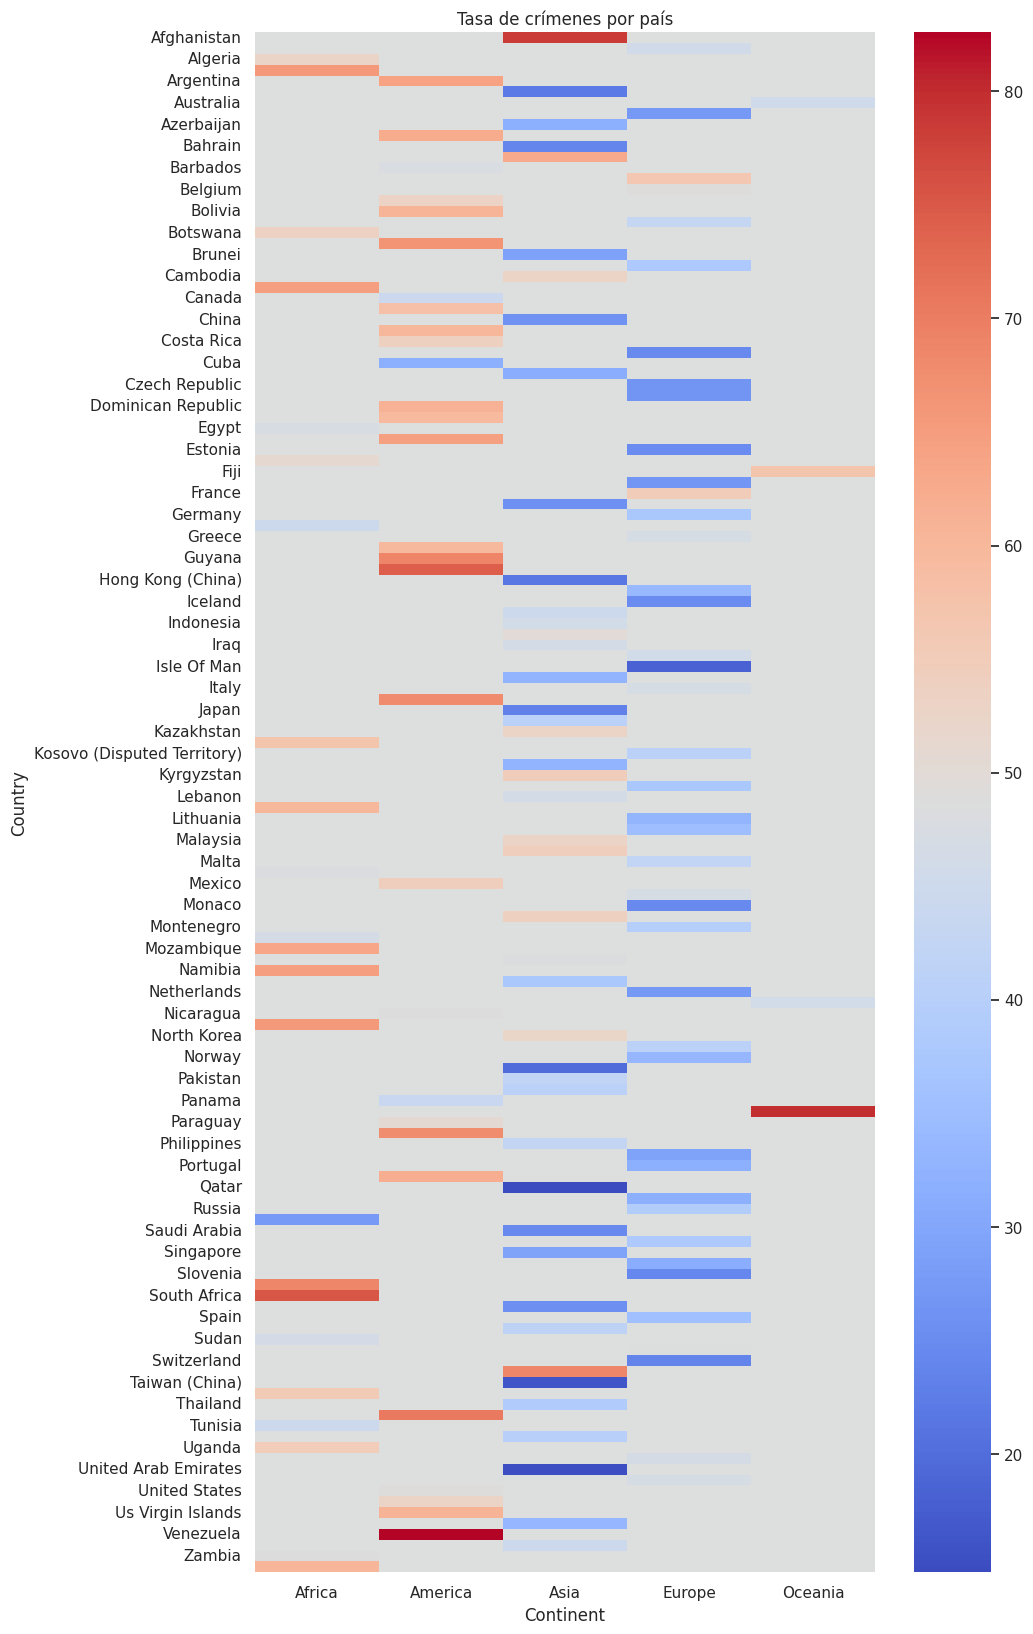

In [27]:
crime_pivot = df_crime.pivot(index="Country", columns="Continent", values="Crime")

plt.figure(figsize=(10, 20))
# crear el mapa de calor
sns.heatmap(crime_pivot, cmap="coolwarm")

# añadir el título del gráfico
plt.title("Tasa de crímenes por país")

# mostrar el gráfico
plt.show()

In [32]:
df_america = df_crime[df_crime['Continent'] == 'America']
df_europe = df_crime[df_crime['Continent'] == 'Europe']
df_asia = df_crime[df_crime['Continent'] == 'Asia']
df_oceania = df_crime[df_crime['Continent'] == 'Oceania']
df_africa = df_crime[df_crime['Continent'] == 'Africa']

In [62]:
most_safety_america = df_america.sort_values('Safety', ascending= False).head(10)
most_safety_europe = df_europe.sort_values('Safety', ascending= False).head(10)
most_safety_asia = df_asia.sort_values('Safety', ascending= False).head(10)
most_safety_oceania = df_oceania.sort_values('Safety', ascending= False).head(10)
most_safety_africa = df_africa.sort_values('Safety', ascending= False).head(10)

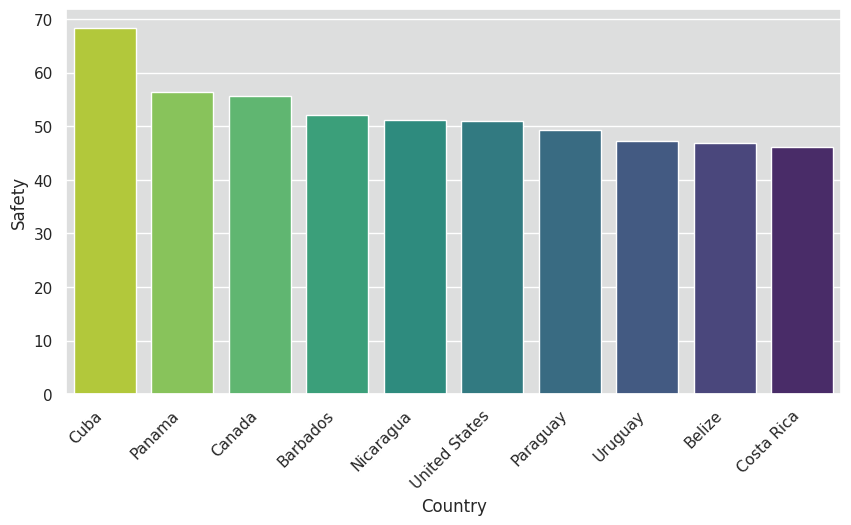

In [98]:

fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(
    data = most_safety_america,
    x = 'Country',
    y = 'Safety',
    palette= "viridis_r",
    ax = ax
)



ax.set_xticklabels(ax.get_xticklabels(), rotation=  45, horizontalalignment = 'right')
plt.show()

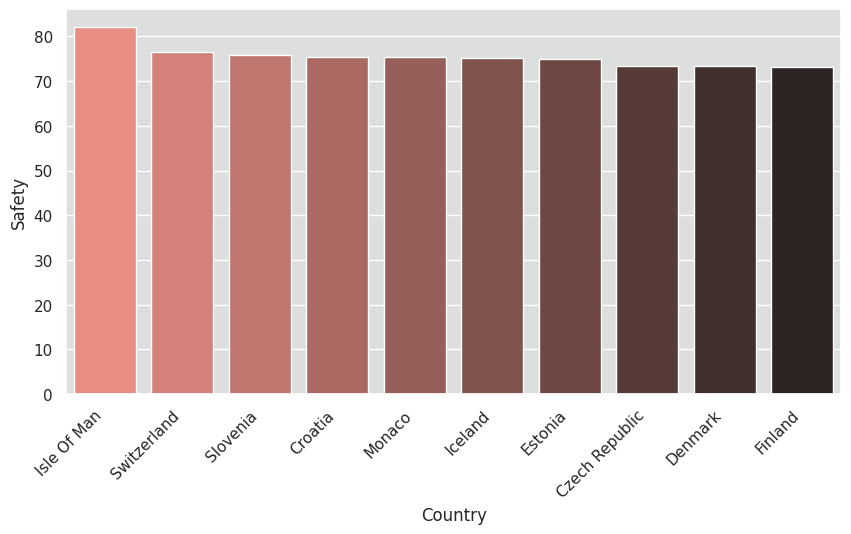

In [103]:
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(
    data = most_safety_europe,
    x = 'Country',
    y = 'Safety',
    palette= 'dark:salmon_r',
    ax = ax
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=  45, horizontalalignment = 'right')
plt.show()

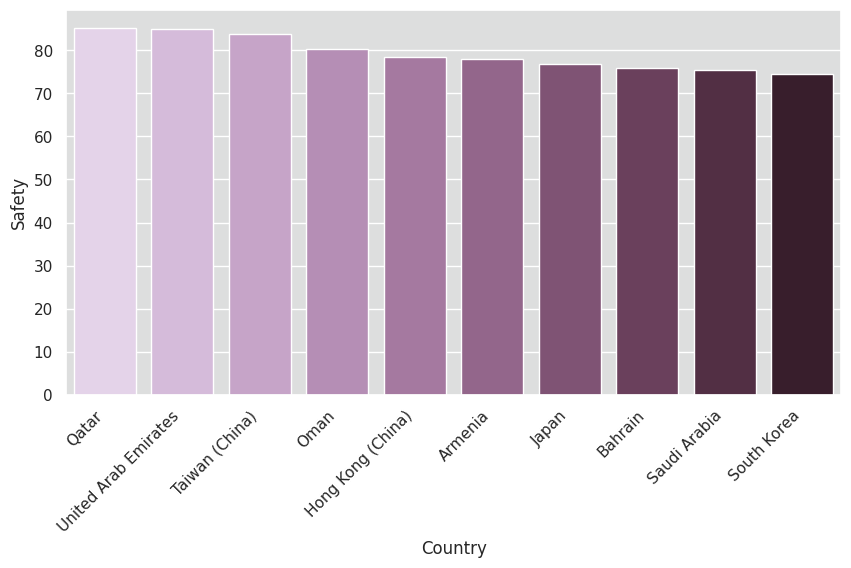

In [112]:
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(
    data = most_safety_asia,
    x = 'Country',
    y = 'Safety',
    palette= 'ch:s=.7,r=-.15',
    ax = ax
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=  45, horizontalalignment = 'right')
plt.show()

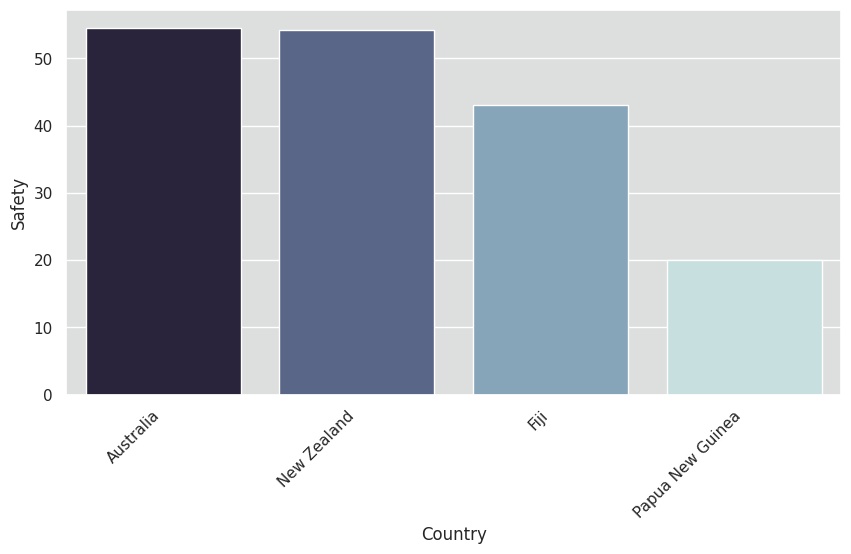

In [122]:
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(
    data = most_safety_oceania,
    x = 'Country',
    y = 'Safety',
    palette= 'ch:start=.2,rot=-.3_r',
    ax = ax
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=  45, horizontalalignment = 'right')
plt.show()

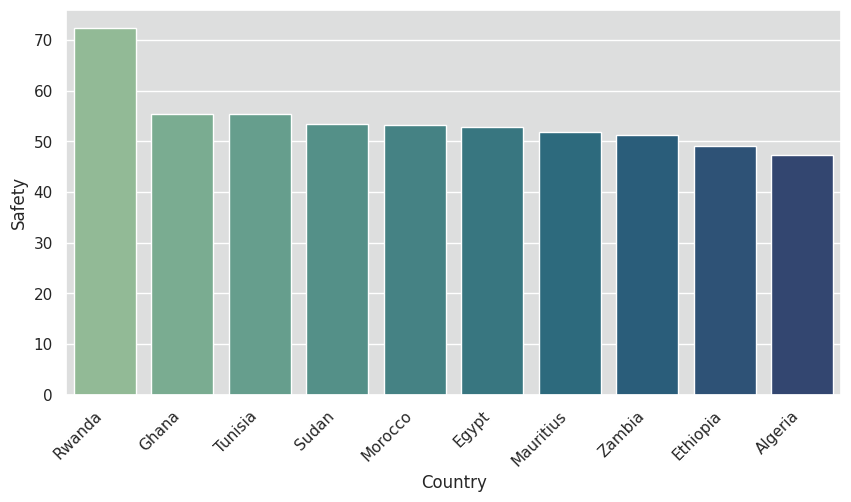

In [130]:
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(
    data = most_safety_africa,
    x = 'Country',
    y = 'Safety',
    palette= 'crest',
    ax = ax
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=  45, horizontalalignment = 'right')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3aa0e2c3-1d5b-4b17-bb31-7a3c04c89158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>